In [2]:
dx=1
dt=0.05

In [181]:
dx=0.5
dt=0.025

In [187]:
dx=0.25
dt=0.0125

In [45]:
import math
import pylab
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
#dx=0.3
#dt=0.0045
D=1                                      # D coefficient  
L=25                                       # x interval (0,20)
T=10                                       # t interval (0,100)
Nx=int(L/dx)+1                                         
Nt=int(T/dt)+1
print(dt/dx**2,1/2*D)

startBorder_0_x = lambda t,x: 40   # Starting border u(t=0,x)
startBorder_t_0 = lambda t,x: 0           # Left border line u(t,x=0)
endBorder_t_L = lambda t,x: 0               # Right border line u(t,x=L)

pi=math.pi
e=math.e
#ck=lambda k: 60/((k*pi)**3)*(1-(k*pi)**2*(1+math.cos(k*pi)))
#analytic=lambda t,x,D,L: (0-30)*x/L+30+sum([math.sin(k*pi*x/L)*ck(k)*e**(-((k*pi)**2)*D*t/L**2) for k in range(1,10)])
ck=lambda k: 80/(k*pi) if k%2==0 else 0
analytic=lambda t,x,D,L: sum([ck(k)*e**(-((k**2)*(pi**2)*D*t/(L**2)))*math.sin(k*pi*x/L) for k in range(1,10)])

u=[]
w=[]

u.append([startBorder_0_x(0,x*dx) for x in range(Nx)]) #init starting border
w.append([startBorder_0_x(0,x*dx) for x in range(Nx)])
t=0
x=0
a=D*dt/(dx**2)

for n in range (Nt-1):
    u.append([])
    w.append([])
    t+=dt
    temp=startBorder_t_0(t+dt,0)
    u[n+1].append(temp)
    w[n+1].append(temp)
    for j in range(1,Nx-1):
        x+=dx
        u[n+1].append(u[n][j] + a*(u[n][j+1] - 2*u[n][j] + u[n][j-1]))
        w[n+1].append(analytic(t,x,D,L))
    x=0
    temp=endBorder_t_L(t+dt,1)
    u[n+1].append(temp)  
    w[n+1].append(temp)
    
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]    

xs,ts = np.meshgrid(xs,ts)


0.05 0.5


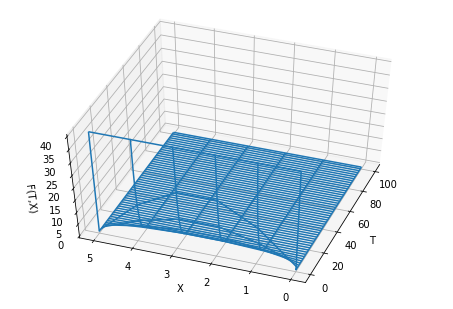

In [46]:
fig = pylab.figure()
ax = Axes3D(fig)
u=np.array(u)
w=np.array(w)
ax.plot_wireframe(ts, xs, u)
ax.view_init(50,200)
ax.set_xlabel('T')
ax.set_ylabel('X')
ax.set_zlabel('F(T,X)')
pylab.show()

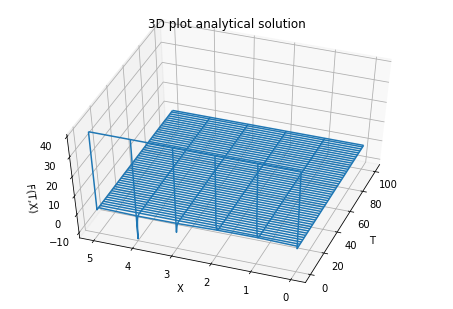

In [47]:
fig = pylab.figure()
ax = Axes3D(fig)
u=np.array(u)
w=np.array(w)
ax.plot_wireframe(ts, xs, w)
ax.view_init(50,200)
ax.set_xlabel('T')
ax.set_ylabel('X')
ax.set_zlabel('F(T,X)')
pylab.title("3D plot analytical solution")
pylab.show()

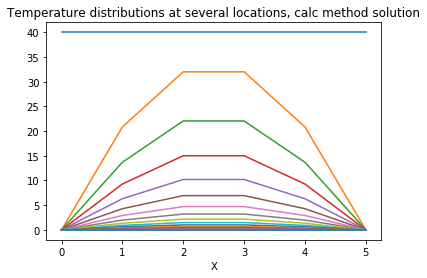

In [49]:
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]
fig = pylab.figure()
for i in range(0,Nt,20):
    pylab.plot(xs,u[i])
pylab.xlabel('X')
pylab.title('Temperature distributions at several locations, calc method solution')
pylab.show()

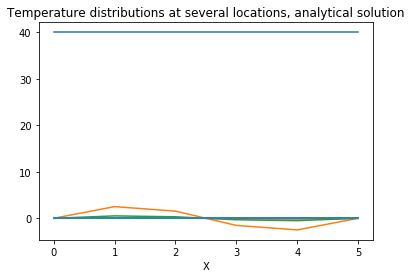

In [48]:
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]
fig = pylab.figure()
for i in range(0,Nt,20):
    pylab.plot(xs,w[i])
pylab.xlabel('X')
pylab.title('Temperature distributions at several locations, analytical solution')
pylab.show()

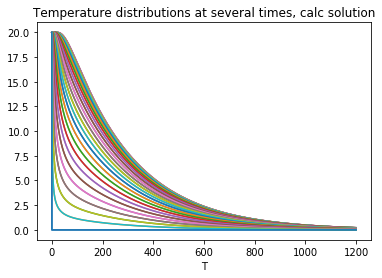

In [43]:
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]
fig = pylab.figure()
for i in range(0,Nx):
    pylab.plot(ts,[u[j][i] for j in range(Nt)])
pylab.xlabel('T')
pylab.title('Temperature distributions at several times, calc solution')
pylab.show()

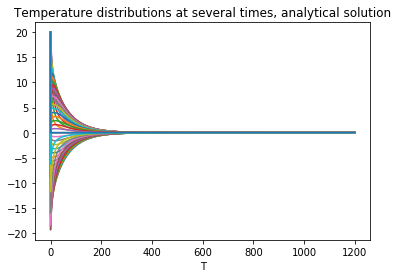

In [44]:
ts=[t*dt for t in range(Nt)]
xs=[x*dx for x in range(Nx)]
fig = pylab.figure()
for i in range(0,Nx):
    pylab.plot(ts,[w[j][i] for j in range(Nt)])
pylab.xlabel('T')
pylab.title('Temperature distributions at several times, analytical solution')
pylab.show()

In [51]:
norm1=[]
ts1=ts[1:]
for i in range(1,Nt):
    norm1.append((sum([(u[i][j]-w[i][j])**2 for j in range(Nx)])/Nx)**(1/2))

In [183]:
norm2=[]
ts2=ts[1:]
for i in range(1,Nt):
    norm2.append((sum([(u[i][j]-w[i][j])**2 for j in range(Nx)])/Nx)**(1/2))

In [189]:
norm3=[]
ts3=ts[1:]
for i in range(1,Nt):
    norm3.append((sum([(u[i][j]-w[i][j])**2 for j in range(Nx)])/Nx)**(1/2))

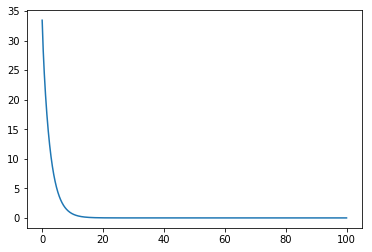

In [52]:
fig = pylab.figure()
pylab.plot(ts1,norm1)
#pylab.plot(ts2,norm2)
#pylab.plot(ts3,norm3)
pylab.show()